# EDA

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.display import display

%matplotlib inline

import statsmodels.api as sm
from statsmodels.api import OLS


import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings('ignore')

In [3]:

df_crime = pd.read_csv("../Processed Data/crimeAndCensus.csv")

In [16]:
missing = df_crime.agg(func = lambda x: np.mean(pd.isnull(x)))

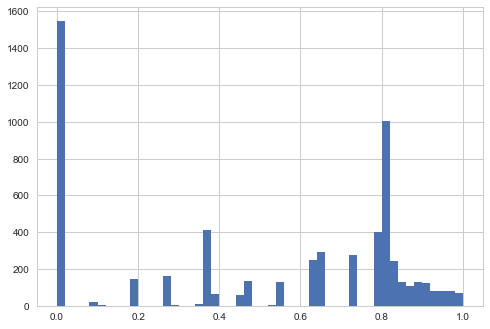

In [19]:
# incorporate year in missing analysis

missing.hist(bins=50)


In [20]:
np.sum(missing < .20)

1719

In [21]:
missing[ missing < .20]

msa_fbi              0.000000
population_fbi       0.000000
murder_fbi           0.000267
year                 0.000000
geoid                0.000000
GEO.display-label    0.010948
GEO.id               0.010948
GEO.id2              0.010948
S01_HC01_EST_VC01    0.010948
S01_HC01_EST_VC03    0.010948
S01_HC01_EST_VC04    0.010948
S01_HC01_EST_VC05    0.010948
S01_HC01_EST_VC06    0.010948
S01_HC01_EST_VC07    0.010948
S01_HC01_EST_VC08    0.010948
S01_HC01_EST_VC09    0.010948
S01_HC01_EST_VC10    0.010948
S01_HC01_EST_VC11    0.010948
S01_HC01_EST_VC12    0.010948
S01_HC01_EST_VC13    0.010948
S01_HC01_EST_VC14    0.010948
S01_HC01_EST_VC15    0.010948
S01_HC01_EST_VC16    0.010948
S01_HC01_EST_VC17    0.010948
S01_HC01_EST_VC18    0.010948
S01_HC01_EST_VC19    0.010948
S01_HC01_EST_VC20    0.010948
S01_HC01_EST_VC23    0.010948
S01_HC01_EST_VC24    0.010948
S01_HC01_EST_VC25    0.010948
                       ...   
S25_HC03_EST_VC06    0.010948
S25_HC03_EST_VC09    0.010948
S25_HC03_E

In [146]:

df_crime['murder_pc'] = df_crime['murder_fbi'] / df_crime['population_fbi'] * 100000
df_crime['ln_pop'] = np.log(df_crime['population_fbi'])

df_crime['murder_fbi_smallcity'] = df_crime['murder_fbi'].where(df_crime['population_fbi'] < 100000, df_crime['murder_fbi']) 


df_crime.head(10)




,msa_fbi,population_fbi,murder_fbi,year,geoid,GEO.display-label,GEO.id,GEO.id2,S01_HC01_EST_VC01,S01_HC01_EST_VC03,...,S28_HC02_EST_VC31,S28_HC02_EST_VC32,S28_HC02_EST_VC33,S28_HC02_EST_VC34,S28_HC02_EST_VC35,S28_HC02_EST_VC36,S28_HC02_EST_VC37,murder_pc,ln_pop,murder_fbi_smallcity
0,"Abilene, TX",169885.0,11.0,2016,10180.0,"Abilene, TX Metro Area",310M300US10180,10180.0,170860.0,6.4,...,0.4,74.3,25.4,(X),0.0,84.9,15.1,6.474968,12.042877,11.0
1,"Akron, OH",703561.0,41.0,2016,10420.0,"Akron, OH Metro Area",310M300US10420,10420.0,702221.0,5.4,...,1.3,75.8,22.9,(X),0.4,94.2,5.4,5.827498,13.463910,41.0
2,"Albany, GA",152566.0,18.0,2016,10500.0,"Albany, GA Metro Area",310M300US10500,10500.0,152506.0,6.0,...,0.3,76.4,23.3,(X),0.0,92.8,7.2,11.798173,11.935353,18.0
3,"Albany, OR",122030.0,0.0,2016,10540.0,"Albany, OR Metro Area",310M300US10540,10540.0,122849.0,6.2,...,0.6,80.5,18.9,(X),0.4,93.9,5.8,0.000000,11.712022,0.0
4,"Albany-Schenectady-Troy, NY",878166.0,18.0,2016,10580.0,"Albany-Schenectady-Troy, NY Metro Area",310M300US10580,10580.0,881839.0,5.3,...,0.4,81.7,17.9,(X),0.1,95.2,4.7,2.049726,13.685591,18.0
5,"Albuquerque, NM",907140.0,75.0,2016,10740.0,"Albuquerque, NM Metro Area",310M300US10740,10740.0,913924.0,5.8,...,0.7,78.0,21.3,(X),0.5,93.1,6.5,8.267743,13.718052,75.0
6,"Alexandria, LA",154032.0,12.0,2016,10780.0,"Alexandria, LA Metro Area",310M300US10780,10780.0,154789.0,6.7,...,0.0,76.0,24.0,(X),0.7,92.6,6.7,7.790589,11.944916,12.0
7,"Allentown-Bethlehem-Easton, PA-NJ",831770.0,22.0,2016,10900.0,"Allentown-Bethlehem-Easton, PA-NJ Metro Area",310M300US10900,10900.0,835652.0,5.3,...,0.9,79.2,19.9,(X),0.3,94.9,4.8,2.644962,13.631311,22.0
8,"Altoona, PA",124942.0,1.0,2016,11020.0,"Altoona, PA Metro Area",310M300US11020,11020.0,124650.0,5.4,...,0.2,75.1,24.7,(X),0.1,95.7,4.2,0.800371,11.735605,1.0
9,"Amarillo, TX",263223.0,14.0,2016,11100.0,"Amarillo, TX Metro Area",310M300US11100,11100.0,263491.0,7.2,...,0.5,77.9,21.6,(X),0.0,93.2,6.8,5.318684,12.480757,14.0


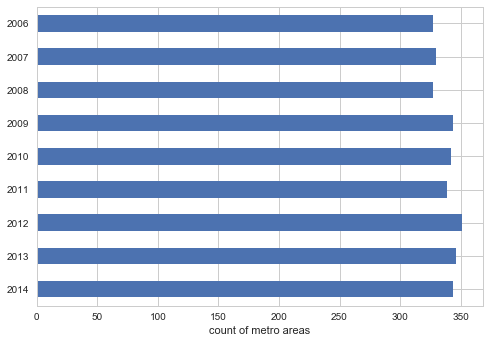

In [159]:
s_years = df_crime["year"]
s_years = s_years.value_counts()
s_years = s_years.sort_index(ascending=False)
count = s_years.plot(kind="barh")
count.set(xlabel="count of metro areas")
plt.savefig('../EDA/obsr_per_year')

In [148]:
df_crime = df_crime[ df_crime.year<2015]
year_data = df_crime[['year','murder_fbi']]

year_summary = year_data.groupby('year')

#year_summary.head()

year_totals = year_summary.sum()
year_totals['year'] = year_totals.index

print(year_totals.shape)
year_totals



(9, 2)


,murder_fbi,year
year,,
2006,14004.0,2006
2007,13792.0,2007
2008,12614.0,2008
2009,12286.0,2009
2010,11808.0,2010
2011,12391.0,2011
2012,12547.0,2012
2013,12014.0,2013
2014,11594.0,2014


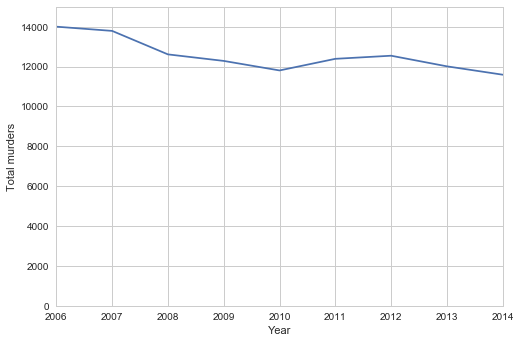

In [149]:
plot_total = year_totals.plot(x="year", y ="murder_fbi", legend=False, ylim=(0,15000) )
plot_total.set(xlabel="Year",ylabel="Total murders")
plt.savefig('../EDA/total_murders_y_fixed')

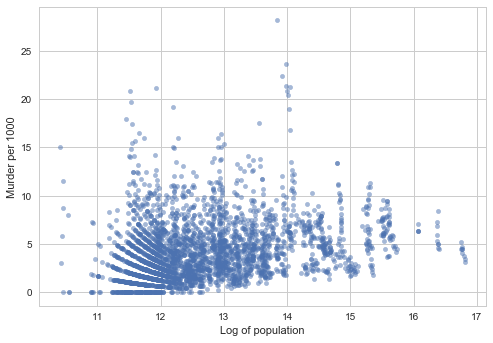

In [150]:
plot_pop = df_crime.plot(x="ln_pop", y="murder_pc", kind="scatter",alpha=0.5)
plot_pop.set(xlabel="Log of population",ylabel="Murder per 1000")
#sns.lmplot("ln_pop", "murder_pc", data=df_crime, fit_reg=True)
plt.savefig('../EDA/population_murder_pc')

In [151]:
d_name_change = {
    "S01_HC01_EST_VC27":"pop_16over",
    "S01_HC01_EST_VC01":"ln_pop_total_census",
    "S06_HC01_EST_VC63":"income_median",
    "S05_HC01_EST_VC143":"poverty_rate",
    "S23_HC04_EST_VC44":"unemployment_16over",
   "S01_HC01_EST_VC36":"demog_sex_ratio",
      "S01_HC01_EST_VC39":"demog_child_dep_ratio",
     "S05_HC01_EST_VC21":"demog_black",
    "S05_HC01_EST_VC22":"demog_amerindian",
    "S05_HC01_EST_VC54":"education_over25_lessthanhs",
    "S05_HC01_EST_VC53":"pop_over25"
    
}

x_of_interest = list(d_name_change.values())

df_crime = df_crime.rename(columns=d_name_change)



In [153]:
df_pair_plot = df_crime[x_of_interest + ["murder_pc"] ]
df_pair_plot["pop_16over"] = pd.to_numeric(df_pair_plot["pop_16over"],errors='coerce') 
df_pair_plot["unemployment_16over"] = pd.to_numeric(df_pair_plot["unemployment_16over"],errors='coerce') 

df_pair_plot.apply(lambda x: sum(np.isnan(x)))

pop_over25                     2592
demog_amerindian               2406
pop_16over                       41
poverty_rate                   2592
income_median                  1354
ln_pop_total_census              40
demog_sex_ratio                  40
demog_black                    2406
unemployment_16over            3050
education_over25_lessthanhs    2592
demog_child_dep_ratio            40
murder_pc                         0
dtype: int64

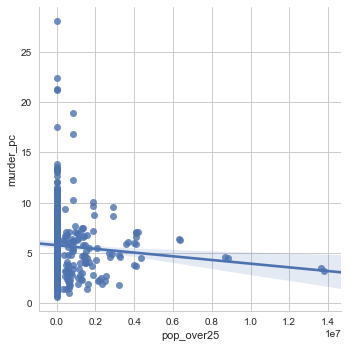

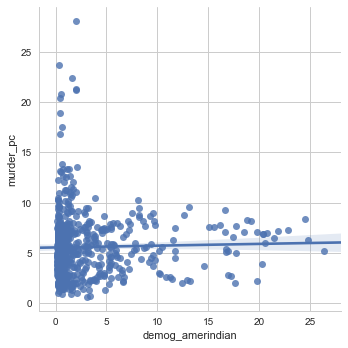

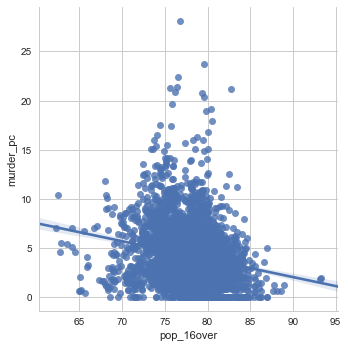

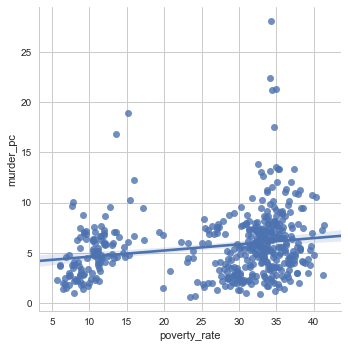

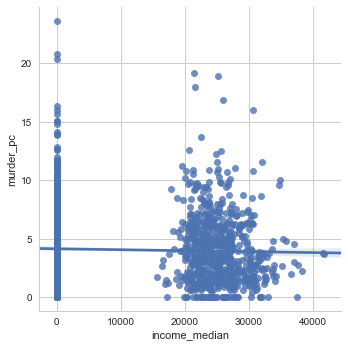

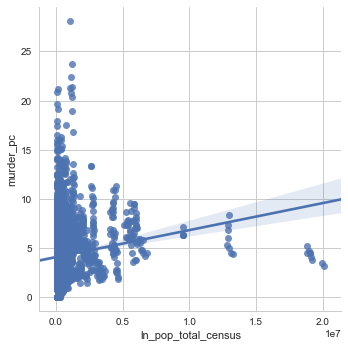

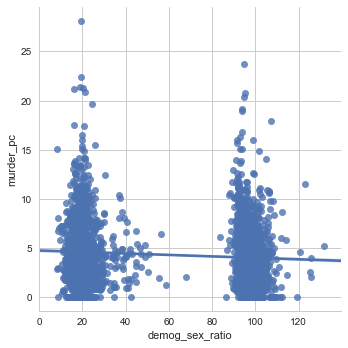

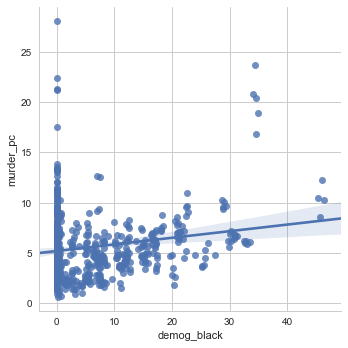

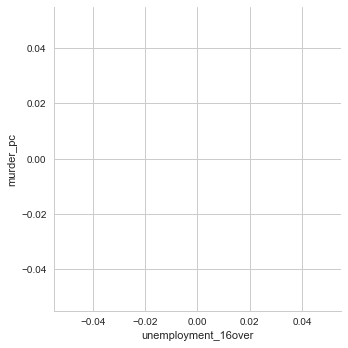

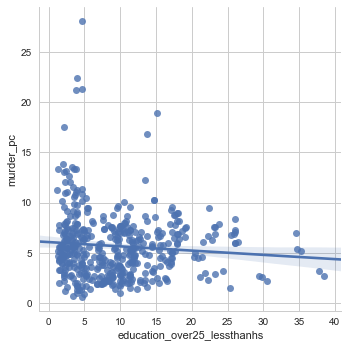

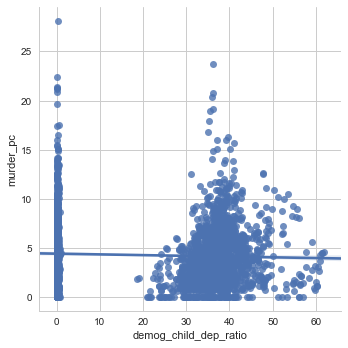

In [154]:
for s_x in x_of_interest:
    df_local = df_pair_plot[ [s_x,"murder_pc"]]
    df_local= df_local.dropna()
    sns.lmplot(s_x, "murder_pc", data=df_local, fit_reg=True ) 
    plt.savefig('../EDA/bivariage_'+s_x)
    plt.show()

** Total murders by year **

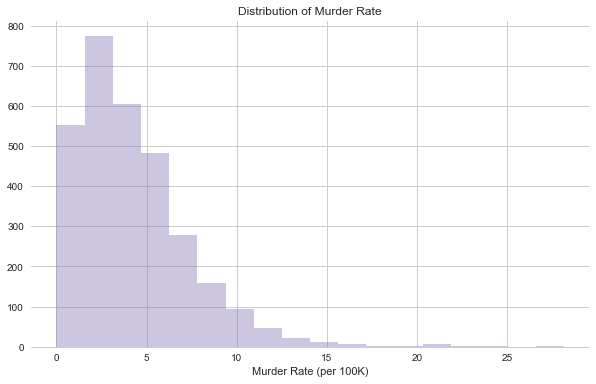

In [110]:


murder_pc = df_crime.murder_pc

f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.despine(left=True)

sns.distplot(murder_pc, kde=False, bins=18, color="m", ax=ax)
ax.set_title("Distribution of Murder Rate")
ax.set_xlabel("Murder Rate (per 100K)")
f.savefig('../EDA/histogram of murder rate to 2014')

** Population vs. Murders **

Scatterplot (2016)

### Census Data Analysis

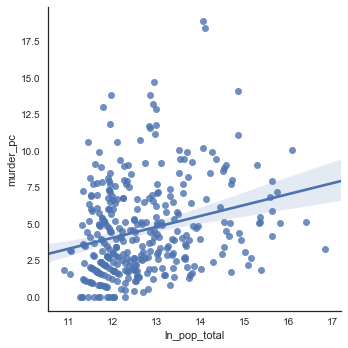

In [33]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("ln_pop_total", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by pop_census')

** Histogram **

(382, 17)


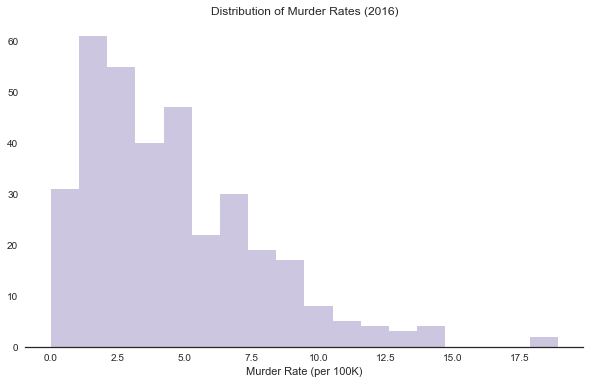

In [11]:
print(df_eda.shape)
df_eda_nomissing = df_eda.dropna(subset=['murder_pc'])


f, ax = plt.subplots(1, 1, figsize=(10, 6))
sns.despine(left=True)

sns.distplot(df_eda_nomissing['murder_pc'], kde=False, bins=18, color="m", ax=ax)
ax.set_title("Distribution of Murder Rates (2016)")
ax.set_xlabel("Murder Rate (per 100K)")
f.savefig('../EDA/histogram of murder rate')

In [12]:
g = sns.distplot(df_eda_nomissing['murder_pc'], kde=False, bins=18, color="m", ax=ax)
#ax.set_title("Distribution of Murder Rates (2016)")
#ax.set_xlabel("Murder Rate (per 100K)")
#g.savefig('../EDA/histogram of murder rate')

** Income **

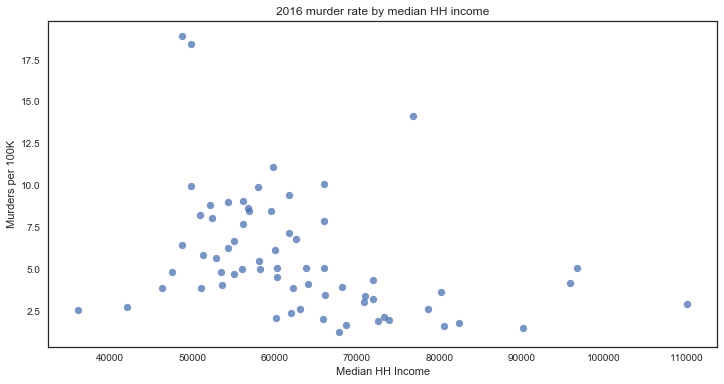

In [13]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['income_hh_median'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by median HH income')
plt.xlabel('Median HH Income')
plt.ylabel('Murders per 100K')
plt.savefig('../EDA/scatter_murder by HH income')

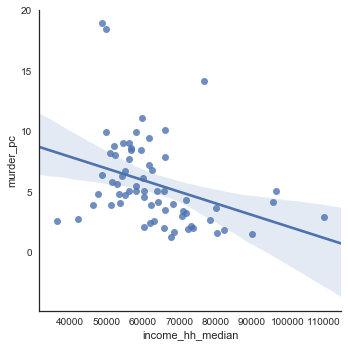

In [14]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("income_hh_median", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by HH income')

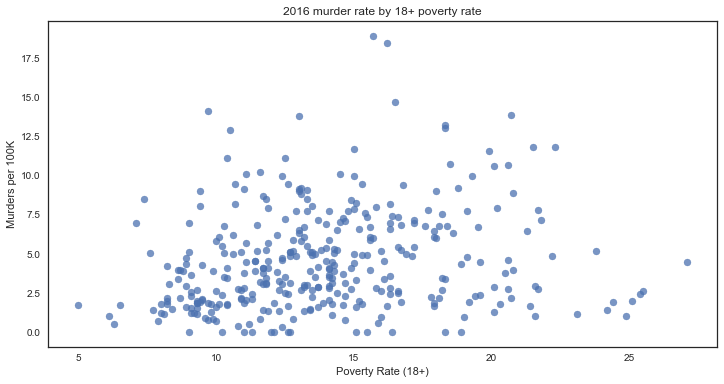

In [15]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['poverty_rate_18over'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by 18+ poverty rate')
plt.xlabel('Poverty Rate (18+)')
plt.ylabel('Murders per 100K')
plt.savefig('../EDA/scatter_murder by poverty rate')

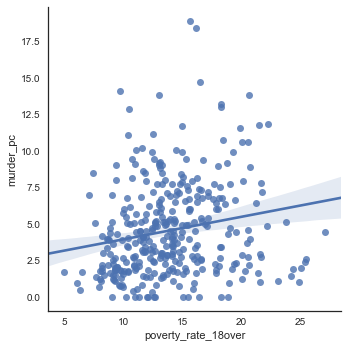

In [16]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("poverty_rate_18over", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by poverty rate')

** Other Demographics **

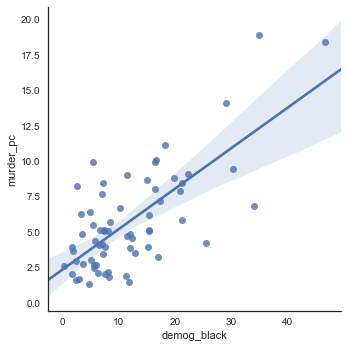

In [17]:
sns.set(style="white", color_codes=True)

g = sns.lmplot("demog_black", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by race=black')

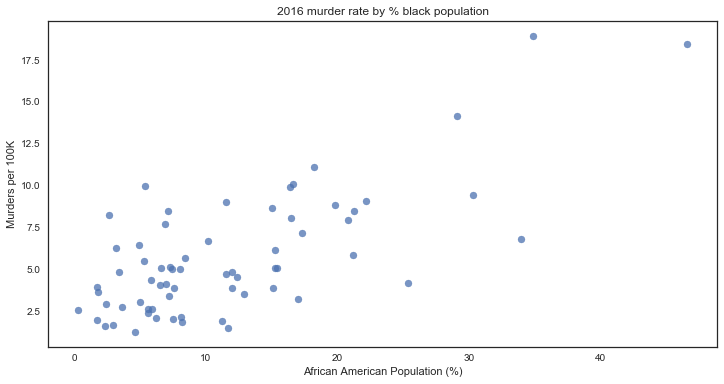

In [18]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['demog_black'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by % black population')
plt.xlabel('African American Population (%)')
plt.ylabel('Murders per 100K')
plt.savefig('../EDA/scatter_murder by race=black')

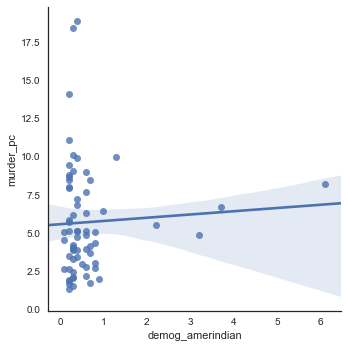

In [19]:
# American Indian

sns.set(style="white", color_codes=True)

g = sns.lmplot("demog_amerindian", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by race=amerindian')

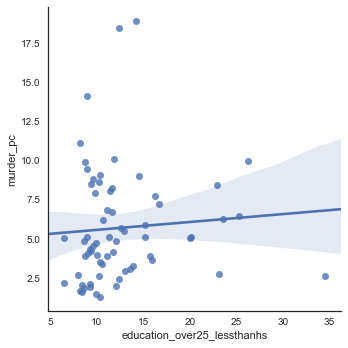

In [20]:
# Less than HS Education (limited data availability)

sns.set(style="white", color_codes=True)

g = sns.lmplot("education_over25_lessthanhs", "murder_pc", data=df_eda, fit_reg=True)
#g.set_titles("test")
g.savefig('../EDA/scatter reg_murder by % over 25 lacking HS diploma')

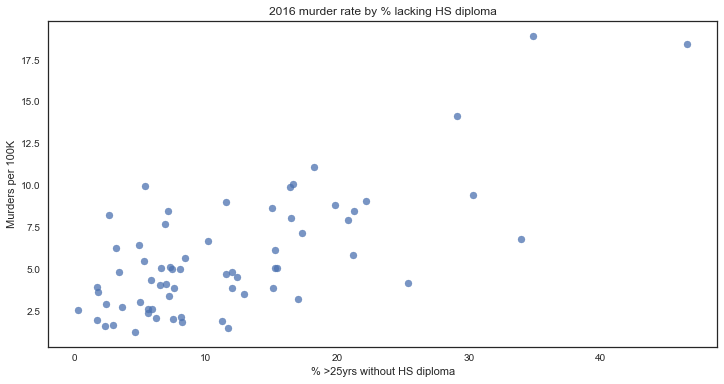

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,6))

ax = plt.scatter(df_eda['demog_black'], df_eda['murder_pc'], alpha=0.75)
plt.title('2016 murder rate by % lacking HS diploma')
plt.xlabel('% >25yrs without HS diploma')
plt.ylabel('Murders per 100K')
plt.savefig('scatter_murder by % over 25 lacking HS diploma')

In [26]:
# only variables with non-missing data (2016)

y = df_eda['murder_pc']
X = df_eda[['ln_pop_total', 'poverty_rate_18over']]

X = sm.add_constant(X)

# Create OLS class instance
est = sm.OLS(y, X, missing='drop')

# Use the fit method in the instance for fitting a linear regression model
results_temp = est.fit()

print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              murder_pc   R-squared:                       0.128
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     25.27
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           5.71e-11
Time:                        20:08:25   Log-Likelihood:                -877.93
No. Observations:                 348   AIC:                             1762.
Df Residuals:                     345   BIC:                             1773.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -9.9404    

In [25]:
# Including variables with significant missing data (2016)

y = df_eda['murder_pc']
X = df_eda[['ln_pop_total', 'income_hh_median', 'poverty_rate_18over', 'demog_black', 'demog_amerindian', 'education_over25_lessthanhs']]

X = sm.add_constant(X)

# Create OLS class instance
est = sm.OLS(y, X, missing='drop')

# Use the fit method in the instance for fitting a linear regression model
results_temp = est.fit()

print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              murder_pc   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     19.41
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           2.38e-12
Time:                        20:01:25   Log-Likelihood:                -142.03
No. Observations:                  66   AIC:                             298.1
Df Residuals:                      59   BIC:                             313.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [31]:
# Data available for 2006

y = df_eda['murder_pc']
X = df_eda[['ln_pop_total', 'pop_16over', 'demog_sex_ratio', 'demog_child_dep_ratio']]

X = sm.add_constant(X)

# Create OLS class instance
est = sm.OLS(y, X, missing='drop')

# Use the fit method in the instance for fitting a linear regression model
results_temp = est.fit()

print(results_temp.summary())

                            OLS Regression Results                            
Dep. Variable:              murder_pc   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.183
Method:                 Least Squares   F-statistic:                     19.00
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           5.00e-14
Time:                        20:19:14   Log-Likelihood:                -817.68
No. Observations:                 323   AIC:                             1645.
Df Residuals:                     318   BIC:                             1664.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    27.23

In [ ]:

# census_pop
Total; Estimate; Total households
Total; Estimate; Total population

Total; Estimate; Total population - SELECTED AGE CATEGORIES - 16 years and over
Total; Estimate; Total population - SUMMARY INDICATORS - Sex ratio (males per 100 females)

Total; Estimate; Total population - SUMMARY INDICATORS - Child dependency ratio


# income
Total; Estimate; EARNINGS IN THE PAST 12 MONTHS (IN 2006 INFLATION-ADJUSTED DOLLARS) FOR FULL-TIME, YEAR-ROUND WORKERS - Population 16 years and over with earnings - Median earnings (dollars) for full-time, year-round workers: - Female
Total; Estimate; EARNINGS IN THE PAST 12 MONTHS (IN 2006 INFLATION-ADJUSTED DOLLARS) FOR FULL-TIME, YEAR-ROUND WORKERS - Population 16 years and over with earnings - Median earnings (dollars) for full-time, year-round workers: - Male
Total; Estimate; Median Household income (dollars)
Total; Estimate; Median earnings (dollars) for full-time, year-round workers: - Female
Total; Estimate; Median earnings (dollars) for full-time, year-round workers: - Male

Percent; Estimate; POVERTY STATUS IN THE PAST 12 MONTHS - Civilian population 18 years and over for whom poverty status is determined - Income in the past 12 months below poverty level

# unemployment
Unemployment rate; Estimate; PERCENT IMPUTED - Employment status for population 16 years and over
Total; Estimate; EMPLOYMENT STATUS - Population 16 years and over - In labor force - Civilian labor force - Unemployed - Percent of civilian labor force



# demographics 
Total; Estimate; Median number of rooms

Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over - Less than high school graduate
Total; Estimate; EDUCATIONAL ATTAINMENT - Population 25 years and over

Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - American Indian and Alaska Native
Total; Estimate; RACE AND HISPANIC OR LATINO ORIGIN - One race - Black or African American



